In [1]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
import numpy as np


(X_train, y_train_labels), (X_test, y_test_labels) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

2022-09-27 11:06:06.993148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-27 11:06:06.993189: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 6


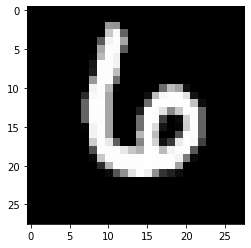

In [2]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [3]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [4]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
from keras.layers import Dense
from keras.models import Sequential

In [6]:
model = Sequential()
model.add(Dense(5, input_shape=(10,), activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


2022-09-27 11:06:09.371643: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-27 11:06:09.371676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (recpi): /proc/driver/nvidia/version does not exist
2022-09-27 11:06:09.371980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model = Sequential()
model.add(Dense(64,input_shape = (28*28,),activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential([
    Dense(64, input_shape=(28*28,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


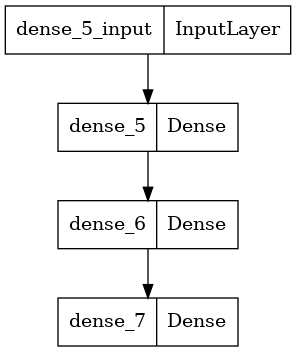

In [9]:
from keras.utils.vis_utils import plot_model

plot_model(model)

In [10]:
config = model.get_config()
config

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_5_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bia

In [11]:
model_3 = Sequential([
    Dense(6, input_shape=(28 * 28,), activation='relu'),
])

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 4710      
                                                                 
Total params: 4,710
Trainable params: 4,710
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_3 = model_3.from_config(config)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])

In [14]:
y_train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
history = model.fit(X_train, y_train,
                   epochs=5,
                   batch_size=10,
                   verbose=1,
                   validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.4757 - accuracy: 0.8656 - val_loss: 0.2703 - val_accuracy: 0.9209
Epoch 2/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.2414 - accuracy: 0.9299 - val_loss: 0.1922 - val_accuracy: 0.9457
Epoch 3/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.1824 - accuracy: 0.9469 - val_loss: 0.1615 - val_accuracy: 0.9530
Epoch 4/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.1470 - accuracy: 0.9574 - val_loss: 0.1478 - val_accuracy: 0.9560
Epoch 5/5
4800/4800 [==============================] - 12s 3ms/step - loss: 0.1235 - accuracy: 0.9641 - val_loss: 0.1309 - val_accuracy: 0.9619


In [17]:
history.history

{'loss': [0.4756614565849304,
  0.24136927723884583,
  0.1824144870042801,
  0.14699068665504456,
  0.1235053688287735],
 'accuracy': [0.8655624985694885,
  0.9298750162124634,
  0.9468541741371155,
  0.9574166536331177,
  0.964104175567627],
 'val_loss': [0.27026525139808655,
  0.19221164286136627,
  0.1615416407585144,
  0.14775796234607697,
  0.13085804879665375],
 'val_accuracy': [0.9209166765213013,
  0.9456666707992554,
  0.953000009059906,
  0.9559999704360962,
  0.9619166851043701]}

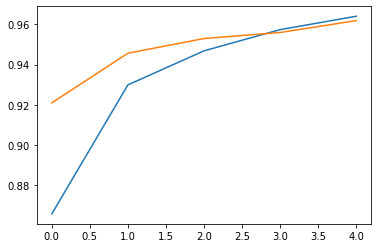

In [19]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')

In [20]:
loss, metric = model.evaluate(X_test,y_test,batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9626


(0.13315415382385254, 0.9625999927520752)

In [21]:
X_test[0][None].shape

(1, 784)

In [22]:
predictions = model.predict(X_test[0][None])
predictions

1/1 [==============================] - 0s 88ms/step


array([[1.6940057e-01, 4.4272263e-02, 7.0647645e-01, 9.6802944e-01,
        2.4651755e-03, 6.4536273e-01, 2.4097832e-05, 9.9975228e-01,
        4.5024338e-01, 6.7875928e-01]], dtype=float32)

In [24]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([7])

0.9997523